Dino Adianto Silalahi_202331193

Import library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

Ambil dataset dari penyimpanan file

In [2]:
data = pd.read_csv('K04_bank_customers.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Menampilkan informasi umum beberapa baris pertama dari data

In [3]:
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(None,
    age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married    unknown      no     1506     yes   no   
 4   33       unknown   single    unknown      no        1      no   no   
 
    contact  day month  duration  campaign  pdays  previous poutcome   y  
 0  unknown    5   may       261         1     -1         0  unknown  no  
 1  unknown    5   may       151         1     -1         0  unknown  no  
 2  unknown    5   may        76         1     -1         0  unknown  no  
 3  unknown    5   may        92         1     -1         0  unknown  no  
 4  unknown    5   may       198         1     -1         0  unknown  no  )

Pilih fitur (X) dan target (y)

In [4]:
X = data[['age', 'job', 'balance', 'education']] 
y = data['y']  

Pisahkan data menjadi data latih dan data uji

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 4), (9043, 4), (36168,), (9043,))

Membuat model dan melatih model menggunakan decision tree

In [7]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
y_train = y_train.squeeze()

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

memprediksi dengan data uji

In [8]:
y_pred = model.predict(X_test)

Evaluasi akurasi

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8826716797522945
Classification Report:
               precision    recall  f1-score   support

          no       0.88      1.00      0.94      7980
         yes       0.67      0.00      0.01      1063

    accuracy                           0.88      9043
   macro avg       0.77      0.50      0.47      9043
weighted avg       0.86      0.88      0.83      9043

Confusion Matrix:
 [[7978    2]
 [1059    4]]


Visualisasi decision tree

Jumlah fitur dalam model: 18


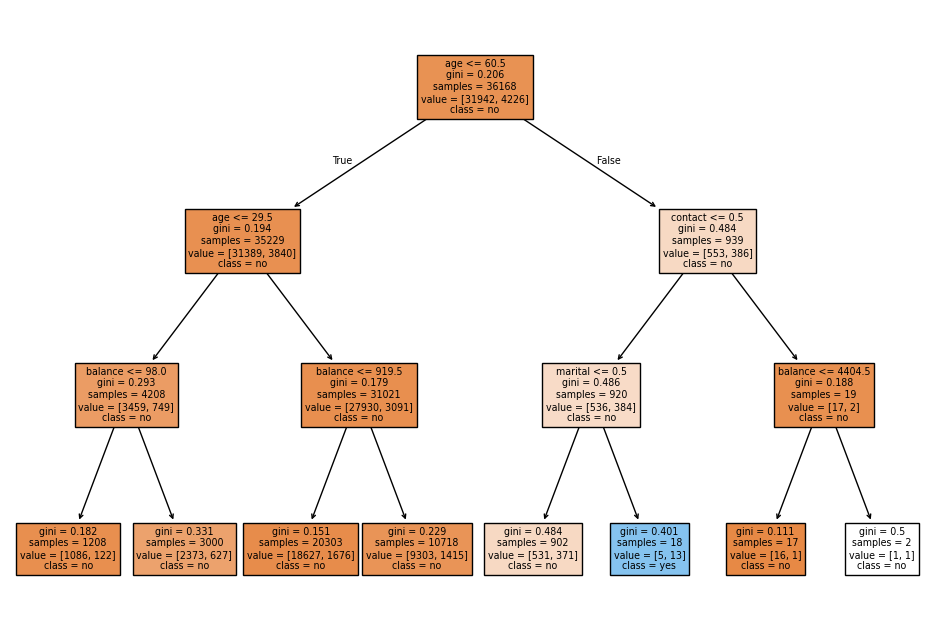

In [11]:
print(f"Jumlah fitur dalam model: {model.n_features_in_}")

plt.figure(figsize=(12, 8))
tree.plot_tree(model, 
               feature_names=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 
          'job', 'marital', 'education', 'default', 'housing', 'loan', 
          'contact', 'month', 'poutcome'], 
               class_names=model.classes_, 
               filled=True)
plt.show()
